In [0]:
from google.colab import files
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [0]:
# (benefit, cost)
knapsack = [(5,3),(6,2),(1,4),(9,5),(2,8),(8,9),(4,10),(3,1),(7,6),(10,7)]
config = {"kp":knapsack, "capacity": 20}

In [0]:
class HillClimber(object):
  

  def __init__(self, kp, capacity, generations=100, mutation_rate=0.3):
    self.kp = kp # Knapsack to be evaluated.
    self.capacity = capacity # Knapsack capacity.
    self.generations = generations # Evolutions to mutate for. 
    self.mutation_rate = mutation_rate # Mutation rate to effect rate of evolution.
    self.geno_shape = len(self.kp) # Shape of desired genotype.
    self.genotype = np.zeros(self.geno_shape, dtype=int) # Store the current optimal working genotype for this HC.
    self.fitness_values = list() # Hold fitness values across evolutions for graphical representation.


  def initalize(self, print_results=False):
    # Enter while loop:
    current_sum = self.capacity + 1
    # Ensure random values do not cause a cost above capacity.
    while current_sum > self.capacity:
      for i, _ in enumerate(self.genotype):
        self.genotype[i] = random.randint(0,1)
        # Update current sum until it holds a value less than capacity.
        current_sum =  np.sum([self.kp[i][1] * self.genotype[i] for i, _ in enumerate(self.kp)])
    if print_results:
      # Inital Results of this HillClimber :
      initial_bene = np.sum([self.kp[i][0] * self.genotype[i] for i, _ in enumerate(self.kp)])
      initial_cost = np.sum([self.kp[i][1] * self.genotype[i] for i, _ in enumerate(self.kp)])  
      print("Initial Benefit: {} \nInitial Cost: {}".format(initial_bene,initial_cost))


  def mutate(self):
    # Declare variable to hold mutated genotype
    mutated_genotype = np.zeros(self.geno_shape, dtype=int)
    # Setup: while loop.
    current_sum = self.capacity + 1
    # Values will be reassigned until the mutated genotype cost is below capacity.
    while current_sum > self.capacity:
      # Copy genotype to temporary genotype.
      mutated_genotype = np.copy(self.genotype)
      for i, _ in enumerate(mutated_genotype):
        num = random.uniform(0,1)  
        # Allow mutation rate to reassign values.
        if num < self.mutation_rate:
          # If "on" switch off.
          if mutated_genotype[i]:
            mutated_genotype[i] = 0
          # If "off" switch on.
          else:
            mutated_genotype[i] = 1
      # Update current sum for the while loop to evaluate.
      current_sum =  np.sum([self.kp[i][1] * mutated_genotype[i] for i, _ in enumerate(self.kp)])
    # Return mutated genotype to be used for comparison.
    return mutated_genotype


  def fitness(self, parent_geno, child_geno):
    # Parent benefit-cost evaluation.
    parent_bene = np.sum([self.kp[i][0] * parent_geno[i] for i, _ in enumerate(self.kp)])
    parent_cost = np.sum([self.kp[i][1] * parent_geno[i] for i, _ in enumerate(self.kp)])
    # Child benefit-cost evaluation.
    child_bene = np.sum([self.kp[i][0] * child_geno[i] for i, _ in enumerate(self.kp)])
    child_cost = np.sum([self.kp[i][1] * child_geno[i] for i, _ in enumerate(self.kp)])
    # Case: benefits are equal, cost is evaluated.
    # Will not occur as values are positive however adds functionality if needs arise.
    if parent_bene == child_bene:
      if parent_cost <= child_cost:
        return parent_geno
      else:
        return child_geno
    # If original genotype has a greater benefit then that genotype is returned.
    elif parent_bene > child_bene:
      return parent_geno
    # If original genotype has a lesser benefit then that mutated genotype is returned.
    else:
      return child_geno


  def evolve(self, print_results=False, final_benefit=False):
    # Create inital genotype.
    self.initalize(print_results)
    # Counter to track generation.
    counter = 0
    while counter < self.generations:
      counter += 1
      # Mutate genotype.
      child_geno = self.mutate()
      # Compare fitness of parent vs child.
      self.genotype = self.fitness(self.genotype, child_geno)
      # Below can be moved into one of the conditionals to save running time.
      # Final benefit value to append to fitness list.
      final_bene = np.sum([self.kp[i][0] * self.genotype[i] for i, _ in enumerate(self.kp)])
      # Tuples of current epoch and successful genotype's total benefit.
      self.fitness_values.append((counter, final_bene))
    # Following two conditionals are for displaying results.
    if print_results:
      # Final Results of this HillClimber:
      final_cost = np.sum([self.kp[i][1] * self.genotype[i] for i, _ in enumerate(self.kp)])  
      print("Final Benefit: {} \nFinal Cost: {}".format(final_bene,final_cost)) 
    if final_benefit:
      return self.genotype, final_bene
    return self.genotype


In [0]:
# Demonstrate the various possibilities of results in binary genotype.
hc = HillClimber(knapsack,20,generations=100,mutation_rate=0.5)
print(hc.genotype)
hc.initalize()
print(hc.genotype)
print(hc.mutate())

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 1 0 0 1 0 0]
[0 0 0 0 0 1 0 0 1 0]


In [0]:
# Initalizes a new hill climber then carries out its evolution.
hc.evolve(print_results=True,final_benefit=True)

Initial Benefit: 19 
Initial Cost: 20
Final Benefit: 28 
Final Cost: 20


(array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0]), 28)

In [0]:
def run_HCs(kp, capacity, gens=250, mutation_rate=0.3, instances=50, plot_graphs=False, superimposed=True, download=False):
  avg_y = list()
  lnwdth = 2 # Linewidth for plot.
  lnstyle = "" # Line colour and style.
  lnalpha = 1 # Line alpha.
  if superimposed:
    lnwdth = 2.5
    lnstyle = "C0--"
    lnalpha = 0.7
  for _ in range(instances):
    data_x = list()
    data_y = list()
    h_c = HillClimber(kp, capacity, gens, mutation_rate)
    h_c.evolve(final_benefit=True)[1]
    for x in range(gens):
      y = h_c.fitness_values[x][1]
      data_x.append(x)
      data_y.append(y)
    if plot_graphs:
      plt.plot(data_x,data_y,alpha=lnalpha)
    # Recieve values for averaging.
    avg_y.append(data_y)
  if plot_graphs and not superimposed:
    plt.xlabel("Generations")
    plt.ylabel("Fitness: Benefit")
    plt.show()
  # Sum corresponding indicies and div by instances for mean benefit across each generation.
  avg_y = [sum(row[i] for row in avg_y) / instances for i in range(len(avg_y[0]))]
  if plot_graphs:
    lbl = "Expected Values\nFinal Value: {}".format(avg_y[-1])
    plt.plot(data_x,avg_y,lnstyle,alpha=1,label=lbl,linewidth=lnwdth)
    plt.xlabel("Generations")
    plt.ylabel("Fitness: Benefit")
    plt.legend(loc="center right")
    if not superimposed:  
      leg = plt.gca().get_legend()
      leg.legendHandles[0].set_visible(False)
    if download == True:
      plt.savefig("test.png",bbox_inches='tight', pad_inches=0.3)
      files.download("test.png")
    plt.show()
  return avg_y[-1]

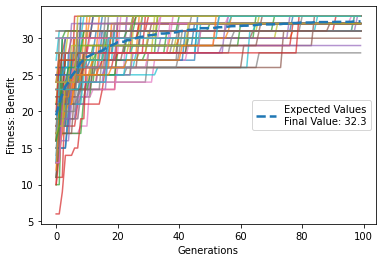

32.3

In [0]:
dwn = True # Download images
run_HCs(config["kp"],config["capacity"],gens=100, instances=100, plot_graphs=True, superimposed=True, download=dwn)

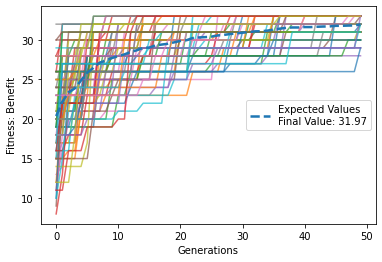

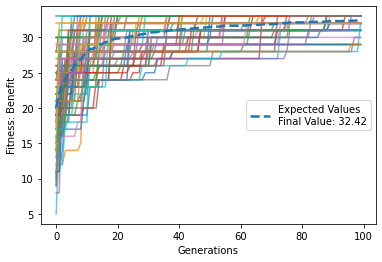

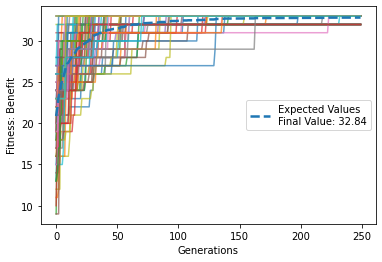

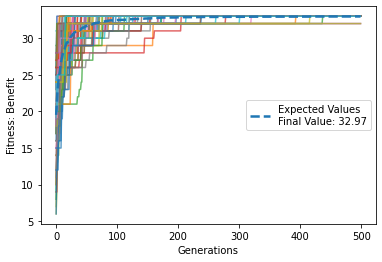

In [0]:
dwn = True # Download images
generational_list = [50,100,250,500]

for gen in generational_list:
  run_HCs(config["kp"],config["capacity"],gens=gen, instances=100, plot_graphs=True, superimposed=True, download=dwn)


Mutation rate: 0.25


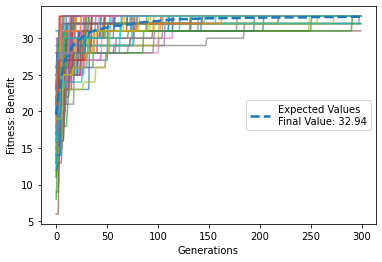

Final Expected Value: 32.94
At this mutation rate simulation time: 4.548075914382935 seconds


Mutation rate: 0.27


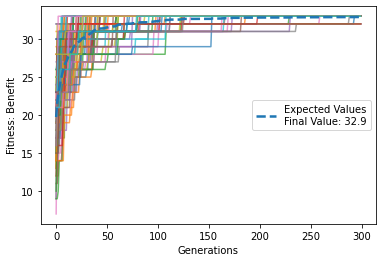

Final Expected Value: 32.9
At this mutation rate simulation time: 4.725513696670532 seconds


Mutation rate: 0.29


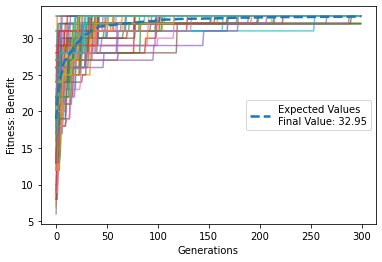

Final Expected Value: 32.95
At this mutation rate simulation time: 4.587963104248047 seconds


Mutation rate: 0.31


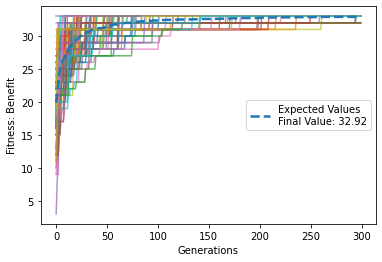

Final Expected Value: 32.92
At this mutation rate simulation time: 4.796123504638672 seconds


Mutation rate: 0.33


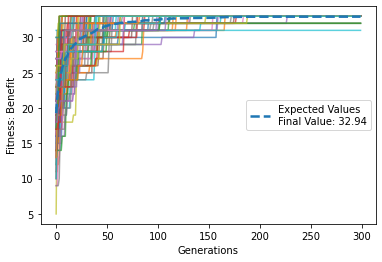

Final Expected Value: 32.94
At this mutation rate simulation time: 4.921863317489624 seconds



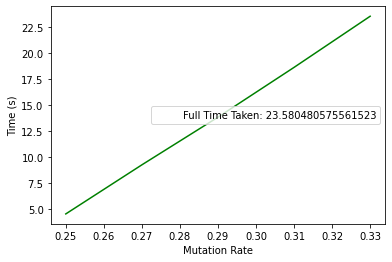

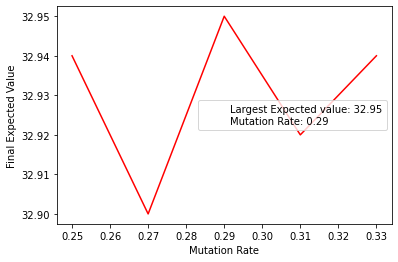

In [0]:
full_time = time.time()#
time_list = list() #
mr_dict = dict()

# Amend for start/stop/step below.
s = {"start":0.25,"stop":0.35,"step":0.02}
# Amend for generations each HC mutates for.
g = 300
# Amend for instances of HCs to be created.
insts = 100
# Amend for graphical rep of run_HCs().
plt_grphs = True

mr = np.arange(s["start"],s["stop"],s["step"])
# Dp purely for displaying correct MR as np.arange can return slightly off floats.
decimal_points = len(str(s["step"]).replace(".","")) - 1 

for val in mr:
  start_time = time.time()#
  print()
  val = round(val,decimal_points)
  print("Mutation rate: {}".format(val))
  # HC evolution.
  max_mean_val = run_HCs(config["kp"],config["capacity"], g, val, insts, plot_graphs=plt_grphs, superimposed=True)#, plot_graphs=True)
  print("Final Expected Value: {}".format(max_mean_val))
  mr_dict[val] = max_mean_val
  tme = time.time() - full_time
  tme2 = time.time() - start_time
  time_list.append(tme)
  print("At this mutation rate simulation time: %s seconds" % (tme2))#
  print()

# Set up time for cumulative time plot.
# N.B if plot=True param is passed to run_HCs time will also include plotting the graphs.
finished_time = time.time() - full_time
#print("Full time: %s seconds" % (finished_time))#

# Section used to plot cumulative time taken against mutation rate.
plt.plot(mr,time_list,"g",label=("Full Time Taken: {}".format(finished_time)))
plt.xlabel("Mutation Rate")
plt.ylabel("Time (s)")
plt.legend(loc="center right")
# Remove legend line.
leg = plt.gca().get_legend()
leg.legendHandles[0].set_visible(False)
plt.show()

# Set up to return MR with largest avg value after x HCs running for y generations.
# N.B in the case of equal values this will return the "first" matching key, value pair in dict.
winning_mr = max(mr_dict.items(), key=lambda k: k[1])
# Plot final expected value against mutation rate as a loss function to find optimal rate.
lbl = "Largest Expected value: {}\nMutation Rate: {}".format(winning_mr[1],winning_mr[0])
# Final Expected values pulled from mutation rate dictionary keys.
fnl_exp_vals = list(mr_dict.values())
plt.plot(mr,fnl_exp_vals,"r",label=lbl)
plt.xlabel("Mutation Rate")
plt.ylabel("Final Expected Value")
#plt.text(0.5,0.5, lbl, ha="right", va="top", transform=plt.gca().transAxes)
plt.legend(loc="center right")
leg = plt.gca().get_legend()
leg.legendHandles[0].set_visible(False)
plt.show()



